In [15]:
# (0) セットアップ

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import matplotlib.pyplot as plt

def error_rate(x, a, b):
    return (1 - erf((x-a) / b * np.sqrt(2))) / 2

def calc_sd(x_data, y_data):
    initial_params = [-5, 1.0]
    params, covariance = curve_fit(error_rate, x_data, y_data, p0=initial_params)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()

    plt.rcParams['font.family'] = ''
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー確率')
    plt.xlabel('clock - data (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def calc_sd_hold(x_data,y_data):
    # フィッティングの実行
    params, covariance = curve_fit(error_rate, x_data, y_data)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()

    plt.rcParams['font.family'] = ''
    #plt.title(title)
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー率')
    plt.xlabel('data - clock (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()

    # フィッティングされたパラメータを表示
    print("Fitted Parameters:", params)
    return params

    
def curve_point_search(x_data,y_data):
    data_index = 0
    for i,data  in enumerate(x_data):
        if i < len(x_data):
            if 0 < float(data) and 1.0 > float(data) and 0 < float(x_data[i]) and 1.0 > float(x_data[i]):
                data_index = i
                break
    return x_data[data_index:data_index+30]

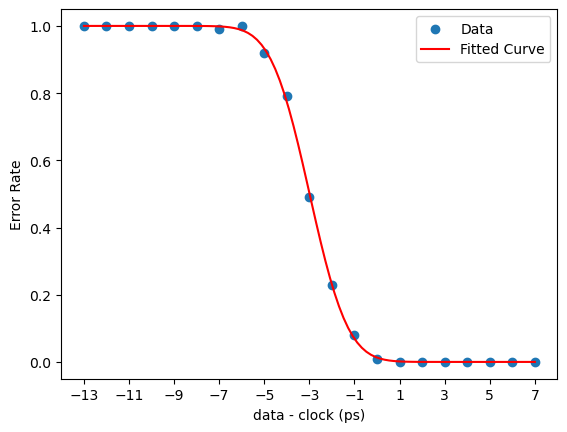

Fitted Parameters: [-2.99171728  2.684262  ]


In [16]:
# (1) ホールドタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing/hold_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "time_param.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = df["time"]-300
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)

#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



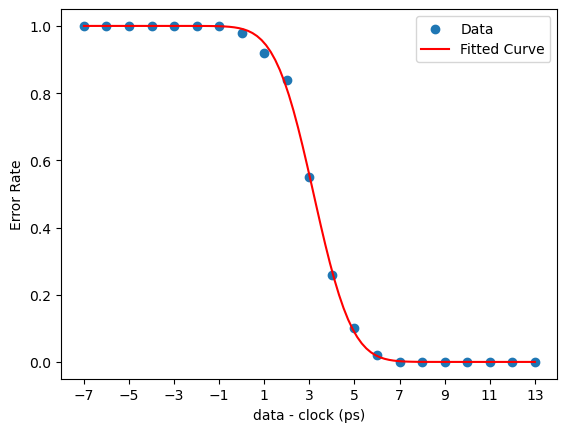

Fitted Parameters: [3.18720256 2.67260003]


In [17]:
# (2) セットアップタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing/setup_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "timing/setup_time.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = 400-df["time"]
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)
#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



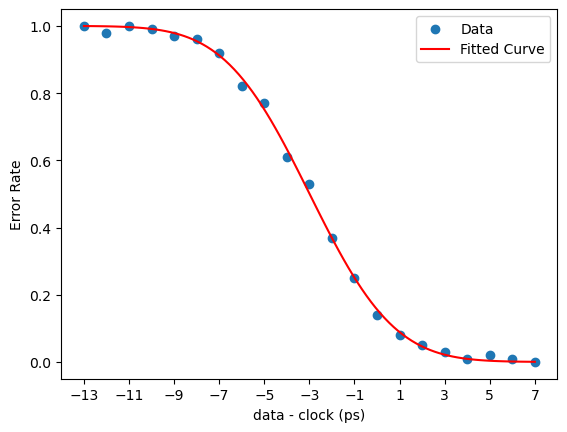

Fitted Parameters: [-2.99163477  5.92031998]


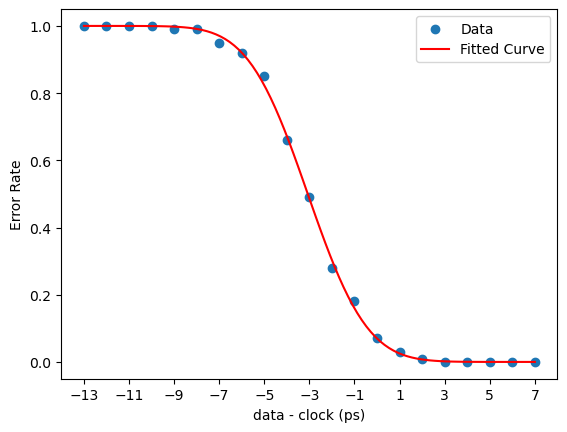

Fitted Parameters: [-3.07268903  4.15833655]


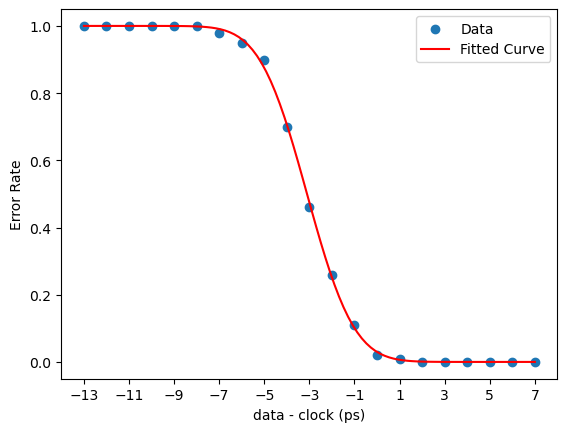

Fitted Parameters: [-3.10574373  3.29507882]


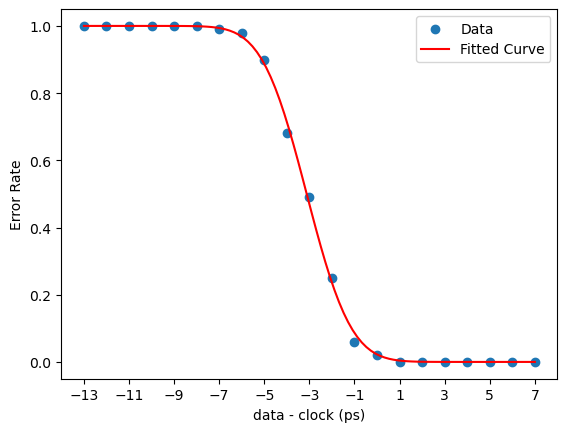

Fitted Parameters: [-3.11985429  3.10756124]


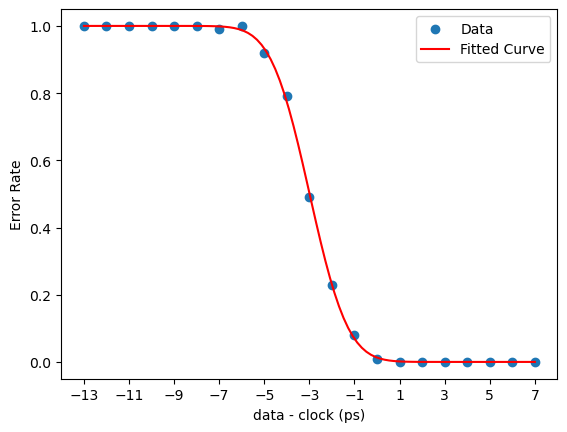

Fitted Parameters: [-2.99171728  2.684262  ]


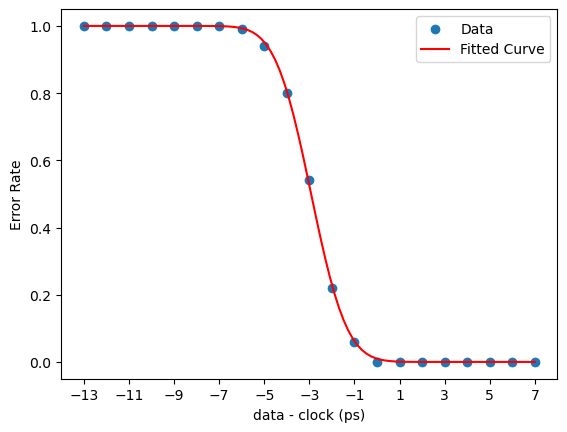

Fitted Parameters: [-2.92361807  2.4970608 ]


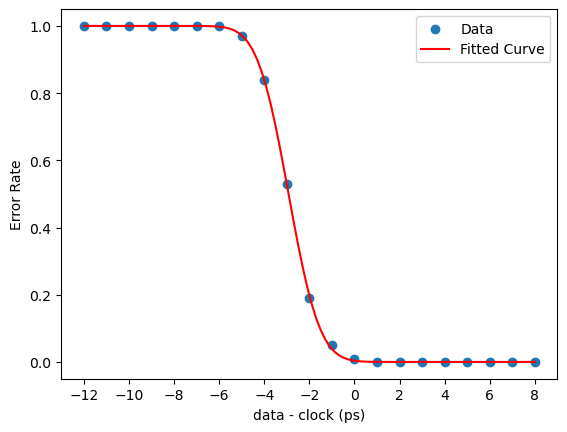

Fitted Parameters: [-2.92426769  2.17328541]


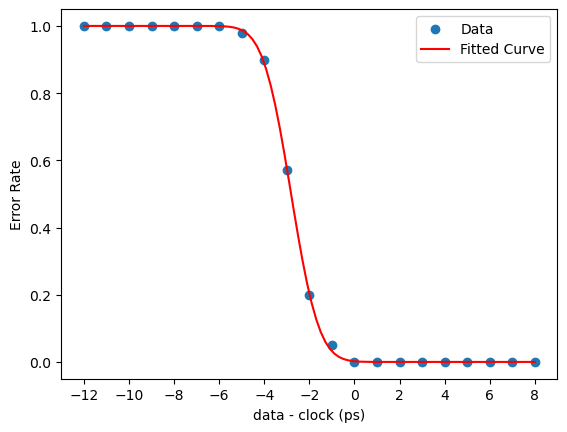

Fitted Parameters: [-2.81190444  1.95269916]


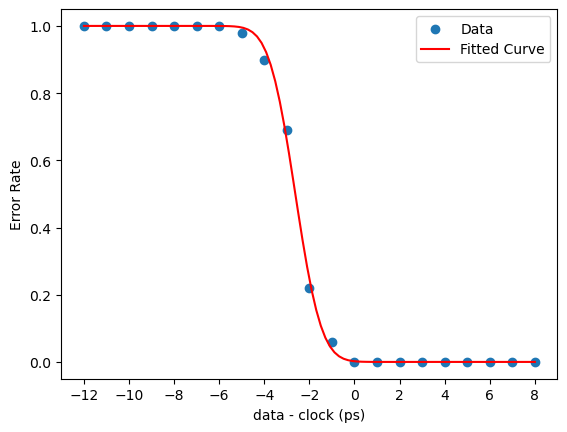

Fitted Parameters: [-2.62488735  1.82483212]


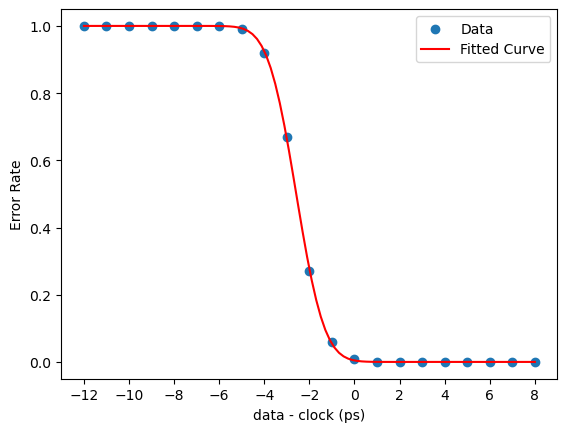

Fitted Parameters: [-2.58355085  1.97097903]


In [18]:
# (3))複数の臨界電流値での算出
log_file = "timing/hold_time.csv"
lic = 192.5

for ic in range(10,110,10):
    file = "timing/hold_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = df["time"]-300
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



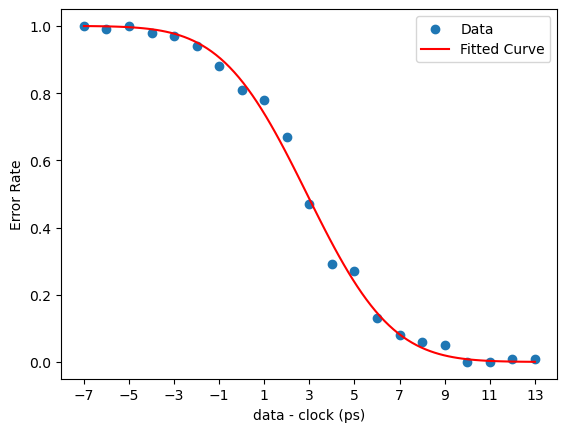

Fitted Parameters: [2.88904462 5.90710199]


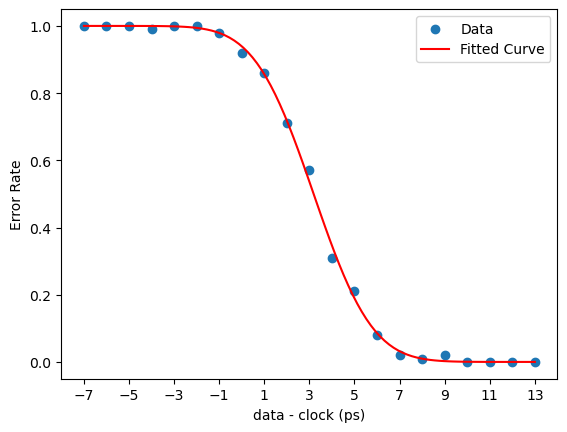

Fitted Parameters: [3.18714035 4.11363996]


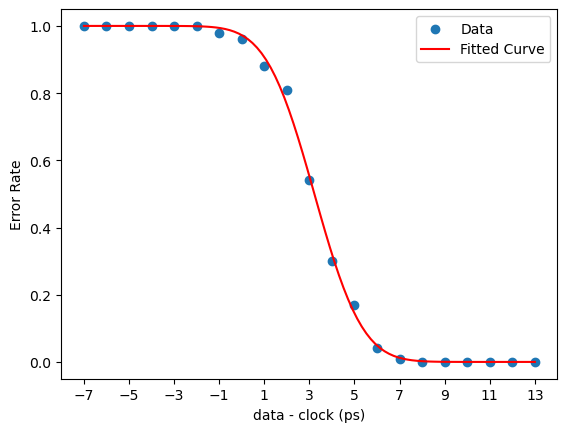

Fitted Parameters: [3.22119259 3.35583193]


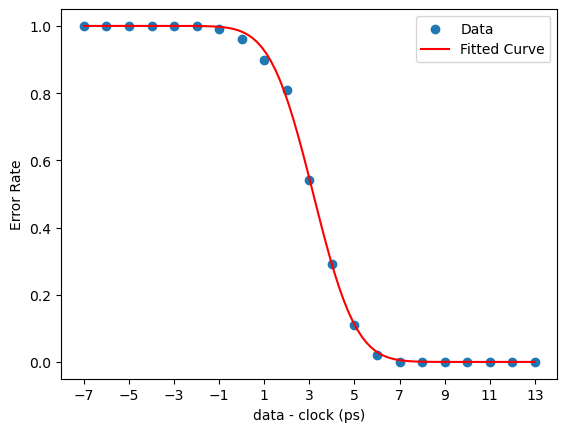

Fitted Parameters: [3.17176507 2.9944485 ]


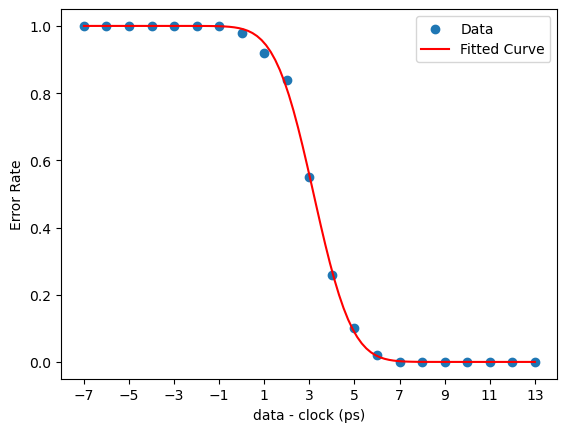

Fitted Parameters: [3.18720256 2.67260003]


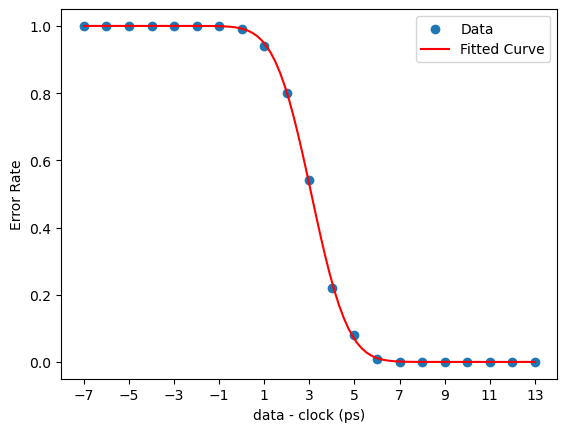

Fitted Parameters: [3.08583107 2.56162745]


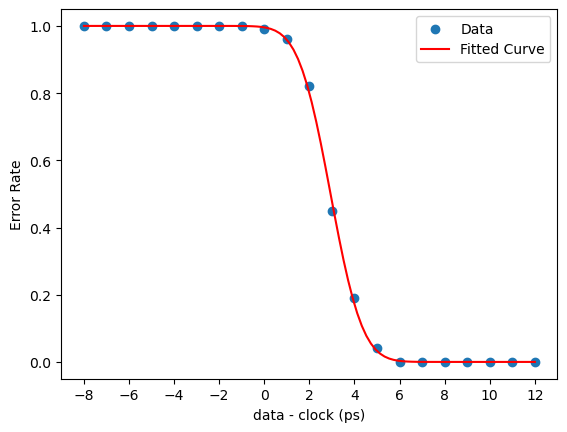

Fitted Parameters: [2.93831195 2.23524188]


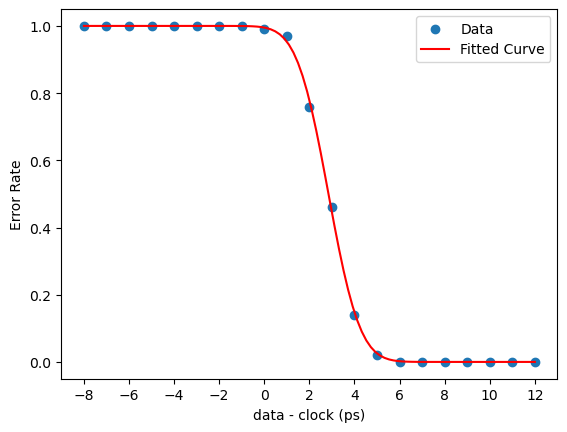

Fitted Parameters: [2.84648342 2.20468603]


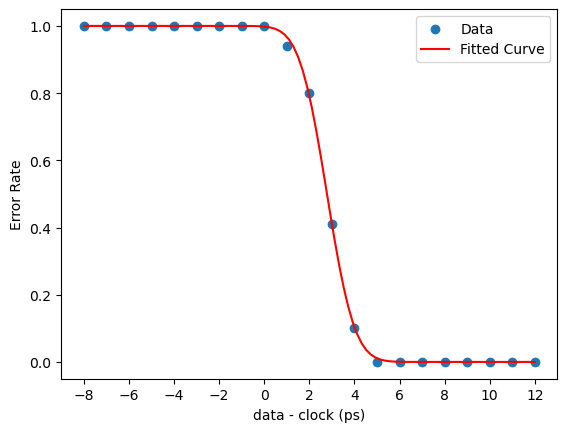

Fitted Parameters: [2.77980231 1.931034  ]


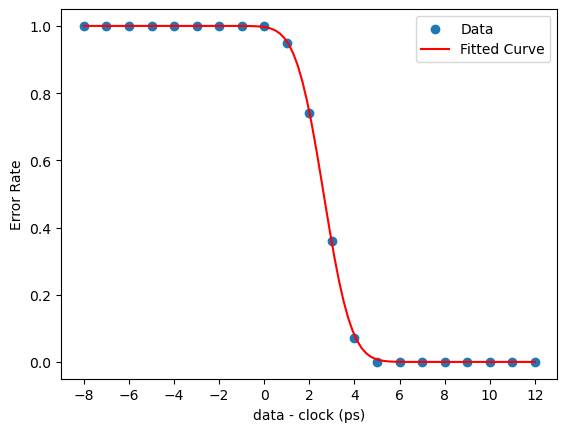

Fitted Parameters: [2.63271419 1.93851965]


In [19]:
log_file = "timing/setup_time.csv"
lic = 192.5

for ic in range(10,110,10):
    file = "timing/setup_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = 400-df["time"]
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)

